# Abstract

**Huffman Encoding** is one of the most basic and elegant applications of the **Greedy Algorithm Design Paradigm**. It provides an optimal method of **lossless data compression** by assigning shorter binary codes to frequently occurring symbols and longer codes to rarely occurring ones.
This project implements Huffman Encoding and Decoding in **Python 3.14.0**, constructs frequency tables and Huffman Trees, and evaluates performance through compression ratio analysis.  
The project presents both the **proof of correctness** and **complexity analysis** of the algorithm and compares the bit cost with that of **fixed-length encoding**.
Experimental results show that Huffman encoding achieves **significant space reduction** when symbol distributions are **non-uniform**, validating its theoretical optimality in practice.


# 1. Introduction and Motivation

In the digital era, where vast quantities of data are produced every second, efficient storage and transmission have become crucial. **Data compression** seeks to represent information using fewer bits than the original form, thereby saving both storage space and communication bandwidth.

Traditionally, according to the number of unique characters, we assign a fixed-length bit string to represent each symbol, as done in encoding schemes such as ASCII. However, characters in real-world data do not occur uniformly—some appear far more frequently than others. To save space, the characters that occur more often should be assigned shorter bit strings, while those that occur less frequently can be assigned longer ones. The challenge, therefore, is to determine an optimal way of assigning these variable-length codes to minimize the overall number of bits required.

Among several compression methods, **Huffman Encoding** stands out as a classic example of lossless compression. It assigns variable-length binary codes to symbols such that frequently occurring symbols receive shorter codes, while rare symbols are given longer codes. But this needs to be done carefully as it is susceptible to ambiguous interpretation. To emphasize this, we consider the example of the Morse code.

![morse code](image_1.png)

The Morse code was designed so that the duration to send each letter was inverse to the frequency of the letter occurring in usual English text. This is generally a good strategy, but we notice that in the encoding of the Morse code we see that a **J** could be interpreted as **AM**, this is not considered a problem in the Morse code since the letters are usually sent with a short time gap. However using this is inefficient for storage to use a separator. Hence, we need a code that cannot be interpreted in multiple ways while having variable length. So the property we need here is

**Prefix free code:** is code system such that there is no whole code word in the system that is a prefix (initial segment) of any other code word in the system.



Morse code, in a way, follows a similar intuition by assigning simpler symbols or shorter actions to frequently occurring letters. However, it does not satisfy the **prefix-free property**; instead, it relies on fixed time intervals to mark the beginning and end of each letter.

**Huffman Encoding** effectively addresses this limitation by constructing a prefix-free variable-length code that minimizes the total expected code length, thereby achieving optimal lossless compression.

---

## Objectives
The goals of this project are to:
1. Implement Huffman Encoding and Decoding in Python.  
2. Construct frequency tables and Huffman Trees for textual data.  
3. Compute and analyze **compression ratios** against fixed-length encoding.  
4. Verify the **prefix-free property** and correctness of the algorithm.  
5. Analyze time and space complexities and demonstrate optimality through experiments.

---



## Data Compression and Information Theory


**Data compression** aims to represent information using the fewest possible bits while preserving meaning.  
It can be broadly classified into two main types:

- **Lossless compression:** The original data is perfectly reconstructed after decoding (e.g., Huffman, Arithmetic, Lempel–Ziv).  
- **Lossy compression:** Some data is irreversibly discarded to achieve higher compression (e.g., JPEG, MP3).

---

Huffman coding is a **lossless**, **variable-length**, **prefix-free** scheme that minimizes the expected number of bits per symbol.

Its foundation lies in **Shannon’s Information Theory (1948)**.  
For a random source $X$ with symbols $x_i$ and probabilities $p_i$, the **entropy** is defined as:

$$
H(X) = - \sum_{i=1}^{n} p_i \log_2 p_i
$$

Entropy represents the theoretical lower bound on the **average number of bits required per symbol**.  
It measures the uncertainty or information content of the source:  
frequent symbols contribute less to entropy than rare ones.

---

If $L$ denotes the average length of a prefix-free code, **Shannon’s Source Coding Theorem** states:

$$
H(X) \leq L < H(X) + 1
$$

Thus, Huffman coding achieves an average code length $L$ that is nearly optimal — within one bit of the entropy limit.

Each symbol carries information proportional to its rarity:

$$
I(x_i) = -\log_2 p_i
$$

Symbols with high probability receive shorter codes, while rare symbols get longer ones, ensuring that the expected total length

$$
L = \sum_{i=1}^{n} p_i \, l_i
$$

is minimized.  
The difference $R = L - H(X)$ represents **redundancy**, which Huffman coding minimizes while maintaining exact recoverability of the original data.




# 2. Problem Definition and Objectives


## Problem Statement


### Formalized Description

**Input:**

1. Alphabet $A = (a_1, a_2, \dots, a_n)$, which is the symbol alphabet of size $n$. 
2. Weights $W = (w_1, w_2, \dots, w_n)$, which is the tuple of positive symbol weights (usually proportional to probabilities), i.e.
$$
w_i = \text{weight}(a_i), \quad i \in \mathbb{N}
$$

**Output:**

Code $C(W) = (c_1, c_2, \dots, c_n)$, which is the tuple of binary codewords, where $c_i$ is the codeword assigned to $a_i$,$\forall i \in \mathbb{N}$ such that $C(W)$ has the properties:

  1. $C(W)$ is a prefix-free code.
  2. Let $L(C(W)) = \sum_{i=1}^{n} w_i \times \text{length}(c_i)$ be the weighted path length of code $C$. $L(C(W)) \leq L(T(W))$ for any other code $T$ satisfying the condition 1.



---

## Informal Description

**Given:**  
A set of symbols $ A=(a_i)_{i=1}^n $, and for each symbol $ x \in A $, the frequency $ w_i $ representing the fraction of symbols in the text that are equal to $a_i$.

**Find:**  
A prefix-free binary code (a set of codewords) with minimum expected codeword length.

---

*Source: Adapted and summarized from the [“Huffman coding” article on Wikipedia](https://en.wikipedia.org/wiki/Huffman_coding).*


## Assumptions and Constraints

- Each input character has a non-negative frequency.  
- All symbols are independent and identically distributed within the input.  
- The output encoding must be prefix-free for correctness.

---


# 3. Algorithm Design

## Algorithmic Overview

The Huffman algorithm is **greedy** in nature — it always tries to obtain the most optimal outcome at each step without considering future consequences.  
It does so by constructing a **prefix-free binary tree**, built iteratively by combining the two least frequent nodes into a single new node and assigning the two original nodes as its left and right children.

In other words, a queue (or priority list) of nodes is maintained, from which the two nodes with the smallest frequencies are repeatedly removed, merged into a new combined node, and then reinserted into the queue. This process continues until only one node remains, which becomes the root of the Huffman tree.

The algorithm can be divided into the following stages:
1. Build a **frequency table** for all unique characters in the text.  
2. Create a **min-heap (priority queue)** of nodes sorted by frequency.  
3. Repeatedly remove the two nodes with the smallest frequencies and merge them into a new node whose frequency is their sum.  
4. Insert the new node back into the heap until only one node remains — the root of the Huffman Tree.  
5. Traverse the tree to assign binary codes: left edge adds a `0` and right edge adds a `1`.


---



## Data Structures Used
- **Priority Queue (Min-Heap):** Ensures efficient extraction of nodes with smallest frequencies, implemented via Python’s `heapq`.  
- **Binary Tree:** Represents hierarchical structure of merged nodes.  
- **Dictionary:** Stores mapping from characters to their Huffman codes.  

---

## Pseudocode

The following pseudocode describes the construction of the Huffman Tree and the generation of the Huffman Codes.

### Algorithm 0: Frequency Table
Input: String $M$ of alphabet $A$.

Output : The frequency table of M.

```
FrequencyTable(M,)
1. Create empty mapping freq_dict
2. Create empty list heap
3. For each character in text:
4. 		If character is in freq_dict: increase its count by 1
5.		Else: map character to 1
```


### Algorithm 1: Build Huffman Tree

Input: Set of symbols $C = \{c_1, c_2, \dots, c_n\}$ with corresponding weights $W=\{w_1,\dots,w_n\}$

Output: Root node of the Huffman Tree
```
HuffmanTree(C,W)
1. Create a min-heap Q and insert all characters with their frequencies.
2. while size(Q) > 1 do
3. x ← Extract-Min(Q)          // Node with smallest frequency
4. y ← Extract-Min(Q)          // Node with second smallest frequency
5. z ← New node with frequency f(z) = f(x) + f(y)
6. z.left ← x
7. z.right ← y
8. Insert(Q, z)
9. end while
10. return Extract-Min(Q) // The remaining node is the root of the Huffman Tree
```




### Algorithm 2: Generate Codes

Input: Root node $N$ of Huffman Tree
Output: Code dictionary for each symbol
```
GenerateCodes(N)
1. If N is a leaf node return a mapping from that character to an empty code
2. Let L = GenerateCodes(N.left)
3. Let R = GenerateCodes(N.right)
4. Prefix all codes in L with "0"
5. Prefix all codes in R with "1"
6. Combine the two dictionaries
7. Return the combined dictionary
```


### Algorithm 3: Encode

Input: A string using alphabet $A$, and a Huffman code of the alphabet $A$

Output: Encoded text using the given code.

```
1. Set encoded to an empty string
2. For each character in text:
3.     Append code of character to encoded
4. Return encoded
```


### Algorithm 4: Decode
Input: The code encoded using a Huffman code, dict storing a Huffman code for some alphabet.

Output: The decoded string.

```
Decode(C,D)
1. Create empty mapping invert_dict
2. For each (character, bitcode) in dict: set invert_dict[bitcode] = character
3. Set decoded to empty string
4. Set buffer to empty string
5. For each bit in code:
6.     Append bit to buffer
7.     If buffer exists in invert_dict:
8.         Append invert_dict[buffer] to decoded
9.         Clear buffer
10. Return decoded
```


---

### Explanation
- The `FrequencyTable` algorithm extracts frequency count from a piece of text. 
- The `HuffmanTree` algorithm constructs the binary tree by repeatedly combining the two least frequent nodes into a new parent node, whose frequency equals their sum.  
- The `GenerateCodes` algorithm traverses the final tree recursively to assign binary codes:
  - A left edge adds a `0`
  - A right edge adds a `1`
  - The resulting codes are **prefix-free**, meaning no codeword is a prefix of another — ensuring unique and unambiguous decoding.
- `Encode` and `Decode` algorithms use the code generated from the Huffman tree to encode or decode. 


**Example: "abracadabra"**

Consider the input string `"abracadabra"`. The frequencies of the characters are:

| Character | Frequency |
|:----------:|:----------:|
| a | 5 |
| b | 2 |
| r | 2 |
| c | 1 |
| d | 1 |

The Huffman algorithm proceeds as follows:
- Merge **c(1)** and **d(1)** → new node with frequency **2**  
- Merge **b(2)** and **r(2)** → new node with frequency **4**  
- Merge node(2) [from c,d] with node(4) [from b,r] → new node with frequency **6**  
- Merge **a(5)** and node(6) → root node with frequency **11**

**Resulting Huffman Codes:**

| Character | Huffman Code |
|:----------:|:-------------:|
| a | 0 |
| r | 111 |
| b | 110 |
| c | 101 |
| d | 100 |



![image.png](abracadabra.png)



---

## **Encoded Output Length**

The length of the Huffman code for the string `"abracadabra"` is: 01101110101010001101110  which consists of **23 bits** in total.  

In contrast, the fixed-length encoding version would require:

$$
(\text{length of "abracadabra"}) \times \lceil \log_2(5) \rceil = 11 \times 3 = 33
$$

Hence, the fixed-length encoded version would be **33 bits**, while the Huffman-encoded version uses **23 bits**, giving a savings of **10 bits (~30.3% reduction)**.








# 4. Correctness

### Key Definitions

**Definition (Prefix-Free Code):** A set of binary codewords is prefix-free if no codeword is a prefix of another.

**Definition (Weighted Code Length):** For the code $C = (c_i)$ and the corresponding weights $W = (w_i)$ we define the weighted code length as
$$
L(C(W)) = \sum_{i=1}^{n} w_i \times \text{length}(c_i)
$$

The goal is to minimize $L(C(W))$ for a given $W$.

**Definition (Full Binary Tree):** A binary tree such that each node has 2 children or is a leaf node. 
**Definition (Path):** A path is a sequence of distinct edges $l_1,l_2,\dots,l_k$ such that each pair consecutive edges are intersecting.

**Definition (Optimal Binary Tree):** An optimal binary tree is a $T$ of alphabet $A=(a_1,\dots,a_n)$ and corresponding weights $W=(w_1,\dots,w_n)$ is a full binary tree with its leaf nodes labelled with elements of $A$ and the quantity
$$
L(T) = \sum_{a_i\text{ leaf of } T} w_i \times \text{depth}(a_i)
$$
is minimized.

---



## Proof of Correctness and Optimality

**Lemma 4.1:** At the end of each step of Huffman's algorithm the heap contains either a labelled node or a binary tree 

**Proof:** We prove by induction on the iteration count.

**Base Case:** On the first iteration we start with only labelled nodes in the heap, hence after we take the least frequent elements $L_1,L_2$ from the heap and create a full binary tree with an unlabeled root whose left child is $L_1$ and right child $L_2$.

**Induction Step:** 
Assume that the statement holds after the $n-1$-th iteration. Then before running the $n$-th iteration all elements in the heap are either labelled or full binary trees. Now we take the least frequent elements $L_1,L_2$ then by induction hypothesis we have that $L_1,L_2$ are labelled node or binary tree, Now we create a node $R$ of which the left child is $L_1$ and right child is $L_2$, we just need to check that the node $R$ is the root node of a full binary tree, We see that $R$ has exactly 2 children. Now by induction hypothesis the child nodes could be labelled nodes or binary trees, hence after joining we get another binary tree. $\blacksquare$

**Lemma 4.2:** Any code from a full binary tree with symbols as leaf nodes produce a prefix-free code.

**Proof:** By a code from a full binary tree we mean that the code corresponding to a symbol on a leaf node is the path $l_1,\dots,l_n$ from the root node to the leaf node, where $l_i$ is 0 if it takes the left edge on the ith step and 1 otherwise. $T$ is a tree, so this path has to be unique. Now if $c_1$ is the code of the letter $a_1$ which is a prefix of $c_2$, the code of $a_2$. $c_1$ is a path to $a_1$, which is a leaf node. Hence, there are no edges from it. So $c_2$ is not a valid path unless $c_1 =c_2$.



**Lemma 4.3:** Let $T$ be a binary tree whose leaf nodes are labeled by $A$ and has the leaves have corresponding weights $W$ also let $x$ and $y$ be 2 leaves in $T$ with weights $w_x,w_y$. Then if $T'$ is a tree made by swapping $x$ and $y$
$$
L(T') - L(T) = (w_y - w_x) (\text{depth}(x,T)-\text{depth}(y,T))
$$
**Proof:**
$$
\begin{align*}
L(T') - L(T) &= w_y \text{depth}(x, T) + w_x \text{depth}(y, T) - w_x \text{depth}(w, T) - w_y \text{depth}(y, T) \\
&= w_y(\text{depth}(x, T) - \text{depth}(y, T)) + w_x(\text{depth}(y, T) - \text{depth}(x, T)) \\
&= (w_y - w_x)(\text{depth}(x, T) - \text{depth}(y, T)) \quad \blacksquare
\end{align*}
$$

**Lemma 4.4:** There exists an optimal binary tree such that symbols with the least weights are siblings

**Proof:** Let $T$ be any optimal tree let $x,y$ be the symbols with leasts weights. By definition, they are always leaf nodes. If there are more than 2 symbols which have the same least frequency take the ones with most depth in the tree.

If $x,y$ are already siblings there is nothing to do, otherwise we have two cases, we assume W.L.O.G $\text{depth}(x) >= \text{depth}(y)$
**Case 1:** $x$ has a sibling leaf node $z$
We create $T'$ by swapping $y$ and $z$ in $T$, then by **Lemma 4.3** we get $L(T') - L(T) = (w_y - w_z)(\text{depth}(z)-\text{depth}(y)) \leq 0$, But $T$ is optimal hence $T'$ is also optimal.

**Case 2:** $x$ does not have a sibling leaf node and hence there is a leaf node $z$ with depth greater than $\text{depth}(x)$.
We swap $x$ and $z$ to get $T'$ and by our choice that $x$,$y$ are the least weighted and having the most depth we have that $w_x < w_z$ and hence by **Lemma 4.3** we have $L(T')<L(T)$ contradicting minimality. So this case is not possible. $\blacksquare$


**Theorem (Correctness of Huffman Coding):** Huffman’s algorithm produces a prefix-free code of minimum expected length.

**Proof:**

Since the size of the heap decreases by 1 each iteration we can say that from **Lemma 4.1** that `HuffmanTree` produces either a single symbol or a full binary tree. Also from **Lemma 4.2** we have that generating a prefix-free code with minimal weighted code length is the same as producing an optimal binary tree. So we prove that `HuffmanTree` produces an optimal binary tree. So we proceed by induction on $|A|$, the size of the alphabet.

**Base Case:** For $|A| = 1$ the algorithm terminates without entering the loop, and it gives a tree with one node labelled $a_1$, this tree will has $L(T)=0$ hence already at minimum.

**Inductive Step:** We have by the induction hypothesis that Huffman algorithm gives an optimal tree for alphabet of size $n-1$. Now we need to prove for alphabets of size $n$. If $A = (a_1,\dots,a_{n-1},a_n)$ and $W=(w_1,\dots,w_{n-1},w_n)$, and let $x,y$ be the least weighted symbols in $A$ then we create a new alphabet $A' = (a_1,\dots,\hat{x},\hat{y},\dots,a_{n},z)$ and $W' = (w_1,\dots ,\hat{w_x},\hat{w_y},\dots,w_{n},w_z =w_{n-1}+w_{n})$. After the first iteration of the algorithm `HuffmanTree(A,W)`, the 2 least frequent elements are made into children of a new node with frequency equal to their sum and hence it will run through the remaining iterations with the modified alphabet $A'$ and weight $W'$ hence the algorithm proceeds the same as `HuffmanTree(A',W')`. By our induction hypothesis we have that `HuffmanTree(A',W')` will give a optimal tree $T'$. Hence $T$ from `HuffmanTree(A,W)` is $T'$ with a binary tree containing $a_n,a_{n-1}$ as children in the place of $z$

$$
\begin{align*}
L(T) & = \sum_{a \in A'} w_a \text{depth}(a,T) + w_x \text{depth}(x,T) + w_y \text{depth}(y,T)\\
& = \sum_{a \in A'} w_a \text{depth}(a,T) + w_z\left(\text{depth}(z,T') + 1\right) \\
& = \sum_{a \in A'} w_a \text{depth}(a,T') + w_z = \sum w_a \text{depth}(a,T') + w_x + w_y \\
& = L(T') + w_x + w_y
\end{align*}
$$

Now assume for contradiction that $T$ is not optimal. Let $S$ be an optimal tree of $A$ that contains $x,y$ as siblings by **Lemma 4.4**. Now by removing $x,y$ from $Z$ and labelling their parent $z$ with weight as their sum we get another full binary tree $Z'$. We can repeat the same calculation above to get $L(Z) = L(Z') + w_x + w_y$. Hence we get $L(T') =L(T) - w_x -w_y > L(Z) - w_x - w_y = L(Z')$ which is a contradiction as $L(T')$ is optimal for $A$. $\blacksquare$


# 5. Complexity Analysis

We now discuss the time and space complexity of each of the algorithms involved in this process.
1. Huffman Tree
1. Code generation
2. Encoding
3. Decoding


## Huffman tree
We first need to initialize a heap using the weights of the alphabet, to heapify this it takes $O(\log |A|)$ time. At each iteration of the loop 2 elements are popped from the heap and an element is pushed to the heap, hence the size of the heap decreases by 1. Hence, the loop will run exactly $|A|-1$ many times.

At the ith iteration of the loop, we have that the heap has length $|A|-i|$, hence the push and pop operations on the min-heap takes $O(\log (|A|-i))$ time each. So the total time complexity will be 
$$
\sum_{i=1}^{|A|-1} 3O(\log |A|-i) = O(|A|\log |A|)
$$

We now consider the space complexity of the algorithm, we are using a heap to store the symbols and the binary subtrees. The algorithm starts with the size $|A|$ and decreases by one at each iteration. Also we have to store the subtrees, which can be atmost $2|A|-1$ size. Hence we have the space complexity as $O(|A|)$.


## Generating Codes
To generate the codes we need to traverse the Huffman tree and when we hit a leaf node we just need to assign its code as the path. We see that `GenerateCode` is called once for each node in the tree, the loop to modify the codes from the recursive call takes $O(|A|)$ time and to combine them also takes $O(|A|)$ time, since this is not depended on the input, we have that they run in $O(1)$ time. Hence, the whole algorithm runs in $|V|O(1)=O(|V|)$ time, where $V$ is the vertices of the binary tree.

To generate the codes we only need to store the codes of each symbol, hence only one entry per symbol hence that can be atmost $|V|$ entries. That makes space complexity as $O(|V|)$. 

## Encoding and Decoding

Once the code is ready: If we have a encoded message $M$
- **Encoding:** $O(M)$ time, where $M$ is message length — we simply look up codes and append bits. So space complexity is $O(kM)$ where k is the largest code length in the Huffman code. Hence the space complexity is $O(M)$.
If we have a encoded string $C$
- **Decoding:** also $O(C)$, traversing throughout the message and when a code is identified it the letter is appended to the encoded string. Also we have that in the worst case the decoding can use one character per bit, making the space complexity $O(C)$

Both phases above are practically linear in message size. 

---

## **Complexity Summary**

| **Phase** | **Input** | **Time** | **Space** |
|:---|:---|:---|:---|
| Tree construction | $A$ (Alphabet) | $O(\lvert A\rvert \log \lvert A\rvert)$ | $O(\lvert A\rvert)$ |
| Generate Codes | $T$ (Huffman Tree) | $O(\lvert V\rvert)$ | $O(\lvert V\rvert)$ |
| Encoding | $M$ (String in the alphabet) | $O(\lvert M\rvert)$ | $O(\lvert M\rvert)$ |
| Decoding | $C$ (Encoded text) | $O(\lvert C\rvert)$ |  $O(\lvert C\rvert)$ |



---


# 6. Canonical Huffman Coding

While standard Huffman coding produces optimal prefix-free codes, it requires transmitting the entire Huffman tree for decoding.  
**Canonical Huffman Coding** eliminates this need by reconstructing codes using only the **code lengths** of symbols.

---

## **Motivation**

In normal Huffman coding, two encoders using the same frequency data can generate different codes, depending on how the tree is traversed.  
To decode correctly, the receiver must therefore know the exact tree.  
Canonical Huffman coding avoids this by transmitting only:

- The list of symbols  
- The symbols corresponding code lengths  

This saves space and guarantees that the same data will always result in the same encoding.

---

## **Illustration with Example**

Consider again the string `"abracadabra"` whose Huffman codes were:

| Symbol | Frequency | Code |
|:-------:|:----------:|:----:|
| a | 5 | 0 |
| r | 2 | 100 |
| b | 2 | 101 |
| c | 1 | 110 |
| d | 1 | 111 |

To make this canonical, we only store the **code lengths**:

$$
\text{a: 1, r: 3, b: 3, c: 3, d: 3.}
$$

Now, we sort the symbols by length (and alphabetically if tied) and reassign codes in increasing binary order:

$$
\begin{array}{lll}
a & \rightarrow & 0 \\
b & \rightarrow & 100 \\
c & \rightarrow & 101 \\
d & \rightarrow & 110 \\
r & \rightarrow & 111
\end{array}
$$

The new codes differ from the original ones, but any decoder that knows only these lengths can reconstruct them exactly in this canonical order.

---

## **Advantages**

- **Space Efficient:** Only code lengths are stored or transmitted, not the tree.  
- **Deterministic:** Both encoder and decoder independently derive identical codes.  
- **Fast:** Enables table-based decoding for high-speed decompression.  
- **Widely Used:** Implemented in `ZIP`, `PNG`, and `JPEG`.

---


Canonical Huffman coding reuses the same probabilities/frequencies as standard Huffman coding but replaces the arbitrary tree layout with a unique, ordered assignment of binary values.  
It achieves the same optimal compression rate while eliminating the need to transmit the entire tree.


# 7. Implementation


## Programming Environment
This project was implemented in **Python 3.14.0** using standard library modules only.  
The following libraries were used:
- `heapq` — for implementing the min-heap (priority queue) used in tree construction.  
- `math` — for logarithmic calculations in compression metrics.
- `matplotlib` and `networkx` for visualizations and plotting.
- `argparse` for input command parsing
- `json` for serializing Huffman codes into JSON files. 

All code was written and tested in a **Jupyter Notebook** and a standard **Python 3.14 environment**
The implementation focuses on readability and simplicity, with detailed comments explaining every step of the Huffman Encoding and Decoding process.

---

## **Input and Output Interface**
The program allows two ways to provide input:
2. **File Input:**  
   A text file can be read from the system for encoding.


---


In [138]:
import heapq


class Node:
    """
    Represents a node in the Huffman tree.
    """

    def __init__(self, char, freq, left, right):
        """
        Initializes a Node.

        :param char: The character the node represents (None for internal nodes).
        :param freq: The frequency (weight) of the character or subtree.
        :param left: The left child node.
        :param right: The right child node.
        """
        self.char = char
        self.freq = freq
        self.left = left
        self.right = right

    def __lt__(self, o):
        """
        Comparison method used by the heapq module.
        Nodes are compared based on their frequency (for min-heap behavior).

        :param o: The other node to compare against.
        :return: True if this node's frequency is less than the other node's frequency.
        """
        return self.freq < o.freq
    def __str__(self):
        """
        For visualisation purposes
        :return self.char
        """
        return rf"${self.char or "*"}:{self.freq}$"


def get_frequency_table(text):
    """
    Calculates the frequency of each character in the text and creates a min-heap
    of leaf Node objects, one for each unique character.

    :param text: The input string.
    :return: A min-heap (list) of Node objects sorted by frequency.
    """
    freq_dict = {}
    heap = []
    print()
    # Count character frequencies
    for char in text:
        if char in freq_dict:
            freq_dict[char] += 1
        else:
            freq_dict[char] = 1
    return freq_dict


def huffman_tree(text):
    """
    Constructs the full Huffman tree from the input text.

    :param text: The input string.
    :return: The root Node of the final Huffman tree, or None if the text is empty.
    """
    # Creates Nodes from frequency table then heapifies it.
    min_heap = [Node(letter,freq,None,None) for letter,freq in get_frequency_table(text).items()]
    heapq.heapify(min_heap)
    if not min_heap:
        return None  # Handle empty input text

    # Continue until only the root node remains in the heap
    while len(min_heap) > 1:
        # 1. Extract the two nodes with the minimum frequencies
        l1 = heapq.heappop(min_heap)
        l2 = heapq.heappop(min_heap)
        # 2. Create a new internal node
        # The new node's frequency is the sum of the two extracted nodes' frequencies.
        # It has no character and its children are l1 and l2.
        new_node = Node("", l1.freq + l2.freq, l1, l2)
        # 3. Insert the new internal node back into the heap
        heapq.heappush(min_heap, new_node)

    # The last remaining node is the root of the Huffman tree
    return min_heap[0]


def huffman_dict(node):
    """
    Generates the Huffman coding dictionary from the constructed Huffman tree
    using a recursive approach.

    :param node: The current node in the tree (starts with the root).
    :return: A dictionary mapping characters to their Huffman codes (e.g., {'a': '101', 'b': '0'}).
    """
    # Base case: If it's a leaf node, the code is an empty string (to be concatenated later)
    if node.char:
        return {node.char: ""}

    # Recursive step: Combine dictionaries from left and right children
    # Codes for the left child are prefixed with '0'
    # Codes for the right child are prefixed with '1'
    return {
        **{char: "0" + code for char, code in huffman_dict(node.left).items()},
        **{char: "1" + code for char, code in huffman_dict(node.right).items()},
    }


def huffman_encode(text, dict):
    """
    Encodes the input text using the provided Huffman coding dictionary.

    :param text: The original string to encode.
    :param dict: The Huffman code dictionary (char -> code).
    :return: The encoded binary string.
    """
    encoded = ""
    for char in text:
        # Append the code for each character
        encoded += dict[char]
    return encoded


def huffman_decode(code, dict):
    """
    Decodes a Huffman encoded binary string using the coding dictionary.

    :param code: The encoded binary string.
    :param dict: The Huffman code dictionary (char -> code).
    :return: The decoded original string.
    """
    # Invert the dictionary for fast lookup of code -> char
    invert_dict = {value: key for key, value in dict.items()}
    decoded = ""
    buffer = ""
    # Iterate through the encoded binary string bit by bit
    for bit in code:
        buffer += bit
        # Check if the current buffer matches a valid Huffman code
        if buffer in invert_dict:
            # If a match is found, append the corresponding character
            decoded += invert_dict[buffer]
            # Reset the buffer for the next character's code
            buffer = ""
    return decoded



### Graph visualizations
We add some code using `matplotlib` and `networkx` for drawing the Huffman graphs.


In [121]:
import matplotlib.pyplot as plt
import networkx as nx

# Converts the Node instance to a graph drawable by networkx, receives the root, returns networkx graph
def generate_graph(node):
	g = nx.DiGraph()
	def search(cur):
		g.add_node(node)
		if cur.left and cur.right:
			g.add_edge(cur,cur.left)
			g.add_edge(cur,cur.right)
			search(cur.left)
			search(cur.right)
	search(node)
	return g
# Generates positions of the nodes given the root node
def generate_pos(node):
	pos_dict = {}
	xpad = 10
	ypad = 20
	def search(cur,x,y):
		pos_dict[cur] = (x*xpad,y*ypad)
		if cur.left and cur.right:
			search(cur.left,x-1 - 0.2*y,y-1)
			search(cur.right,x+1 + 0.2*y,y-1)
	search(node,0,0)
	return pos_dict





### Sample run on "abracadabra"

We run the visualization on "abracadabra" 


Original Text: abracadabra
Encoded Text: 01111100101010001111100
Decoded Text: abracadabra
Verified: True

--- Huffman Codes ---
a: 0 (length = 1)
b: 111 (length = 3)
c: 101 (length = 3)
d: 100 (length = 3)
r: 110 (length = 3)

Original size: 88 bits
Compressed size: 23 bits
Compression ratio: 0.261 (26.14% of original size)


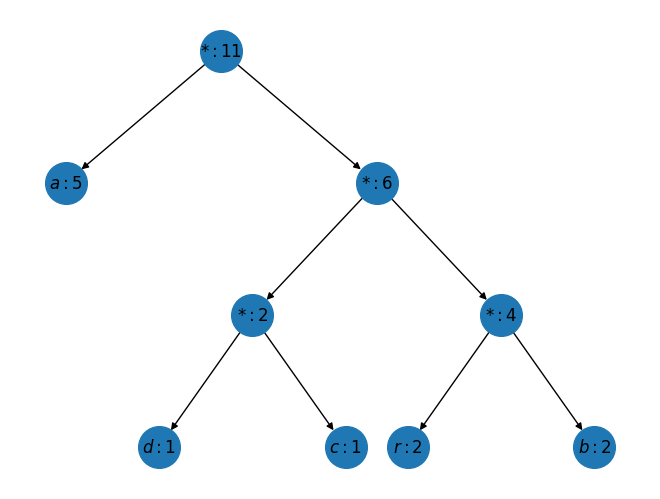

In [122]:
text = "abracadabra"
tree = huffman_tree(text)
codes = huffman_dict(tree)
encoded = huffman_encode(text, codes)
decoded = huffman_decode(encoded, codes)

print("Original Text:", text)
print("Encoded Text:", encoded)
print("Decoded Text:", decoded)
print("Verified:", decoded == text)

print("\n--- Huffman Codes ---")
for char, code in sorted(codes.items()):
    print(f"{char}: {code} (length = {len(code)})")

original_bits = len(text) * 8
compressed_bits = len(encoded)
compression_ratio = compressed_bits / original_bits
print(f"\nOriginal size: {original_bits} bits")
print(f"Compressed size: {compressed_bits} bits")
print(f"Compression ratio: {compression_ratio:.3f} ({compression_ratio*100:.2f}% of original size)")

graph = generate_graph(tree)
pos = generate_pos(tree)
nx.draw(graph,pos,node_size=900,with_labels=True)

# 8. Experiments, Datasets and Observations


## Experimental Datasets
The datasets used for experimentation were obtained from the  
[Canterbury Corpus](https://corpus.canterbury.ac.nz/descriptions/). Specifically the Large-Corpus and the Calgary-Corpus datasets.  
Only the following subset of files was used in our experiments:




| Dataset | Category | Size(bytes) |
| :--- | :--- | :--- |
| E.coli | Complete genome of the E. Coli bacterium | 4638690 |
| bible | The King James version of the bible | 4047392 |
| world | The CIA world fact book | 2473400 |

<br>

| Dataset | Category | Size (Bytes)|
| :--- | :--- | :--- |
| bib | Bibliography (refer format) | 111261 |
| book1 | Fiction book | 768771 |
| book2 | Non-fiction book (troff format) | 610856 |
| news | USENET batch file | 377109 |
| paper1 | Technical paper | 53161 |
| paper2 | Technical paper | 82199 |
| paper3 | Technical paper | 47626 |
| paper4 | Technical paper | 13580 |
| paper5 | Technical paper | 12274 |
| paper6 | Technical paper | 39124  |
| progc | Source code in "C" | 39611 |
| progl | Source code in LISP | 71646 |
| progp | Source code in PASCAL | 49379 |

---



## **Compression Analysis**
The compression achieved varied according to the number of unique symbols and how unevenly they appeared.  

Two baselines were considered for comparison:
1. **ASCII encoding** — each character uses 8 bits (practical baseline).  
2. **Fixed-length code** — each symbol uses $\lceil \log_2 |A| \rceil$ bits,  
   where $|A|$ is the number of distinct characters in the dataset 


### Loading the data
We start our testing by loading the data from the above datasets.

In [123]:
large_corpus_files = [
    'E.coli',
    'bible.txt',
    'world192.txt',
]

calgary_corpus_files = [
    'bib', 'book1', 'book2', 'news',  
    'paper1', 'paper2','paper3','paper4','paper5','paper6', 'progc', 'progl', 'progp' 
]

LARGE_CORPUS_DIR = "./large"
CALGARY_CORPUS_DIR = "./calgary"

large = {}
calgary = {}
for file in large_corpus_files:
    with open(f"{LARGE_CORPUS_DIR}/{file}","r",encoding="ascii") as f:
        large[file] = f.read()

for file in calgary_corpus_files:
    with open(f"{CALGARY_CORPUS_DIR}/{file}","r",encoding="ascii") as f:
        calgary[file] = f.read()


### Plotting the compression

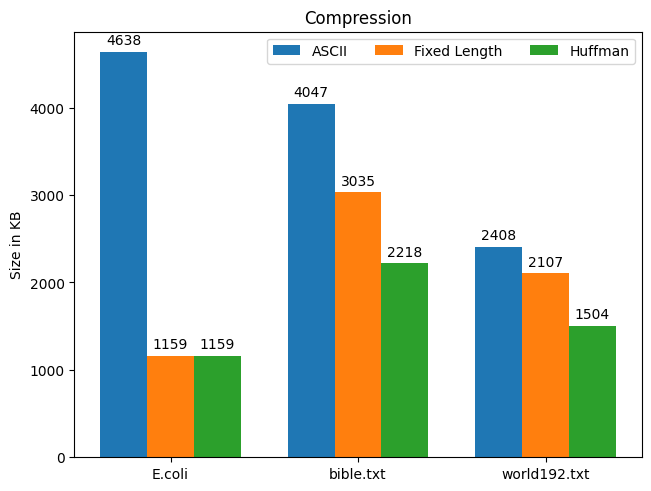

In [124]:
import matplotlib.pyplot as plt
import math
import numpy as np

asciisize = []
huffmansize = []
fixedlengthsize = []
lettersused = []
for name,text in large.items():
    tree = huffman_tree(text)
    code = huffman_dict(tree)
    lettersused += [len(code)]
    encoded = huffman_encode(text,code)
    fixedlengthsize += [(math.ceil(math.log(len(code),2)) * len(text) )// 8000]
    asciisize += [(len(text)) // 1000]
    huffmansize += [len(encoded)//8000]



datasetnames = large.keys()
datasize = {
    'ASCII': asciisize,
    'Fixed Length': fixedlengthsize,
    'Huffman': huffmansize,
}

x = np.arange(len(datasetnames))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in datasize.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Size in KB')
ax.set_title('Compression')
ax.set_xticks(x + width, datasetnames)
ax.legend(loc='upper right', ncols=3)

plt.show()


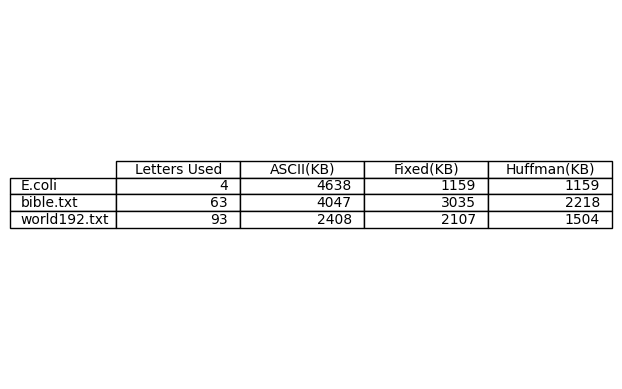

In [125]:
ascii_encoding = np.array(asciisize)
fixed_encoding = np.transpose(fixedlengthsize)
huffman_encoding = np.transpose(huffmansize)
lettersusedcol = np.transpose(lettersused)

table = np.vstack((lettersusedcol,ascii_encoding,fixed_encoding,huffman_encoding)).transpose()
fig, ax = plt.subplots()
# fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=table,rowLabels=large_corpus_files,colLabels=["Letters Used","ASCII(KB)","Fixed(KB)","Huffman(KB)"],loc="center")
plt.show()

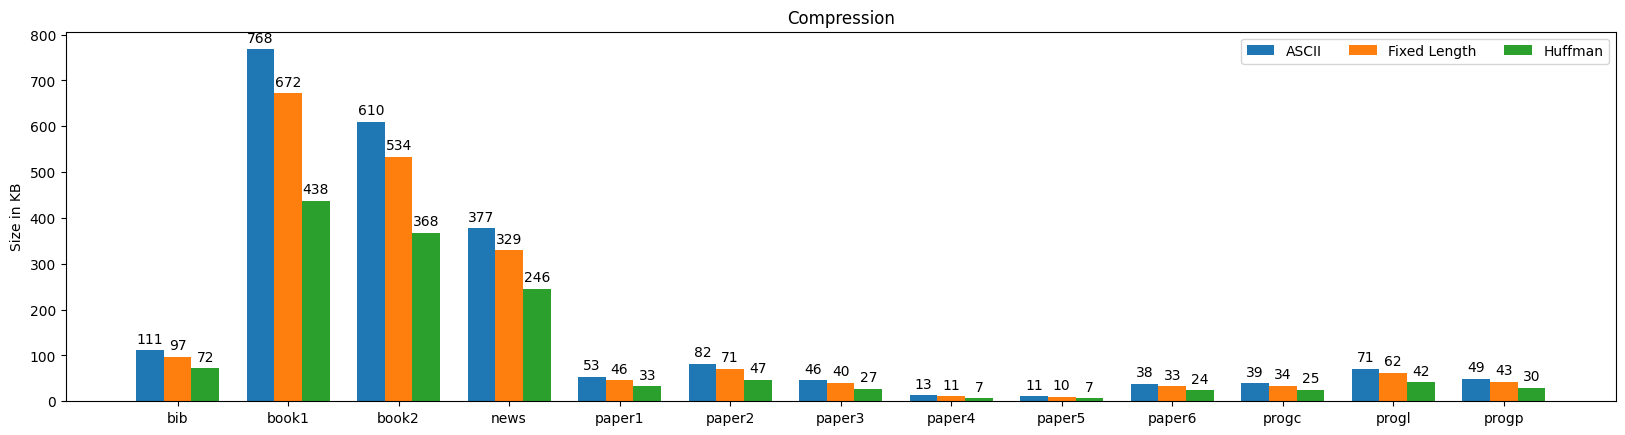

In [126]:
asciisize = []
huffmansize = []
fixedlengthsize = []
lettersused = [] 
for name,text in calgary.items():
    tree = huffman_tree(text)
    code = huffman_dict(tree)
    lettersused +=  [len(code)]
    encoded = huffman_encode(text,code)
    fixedlengthsize += [(math.ceil(math.log(len(code),2)) * len(text) )// 8000]
    asciisize += [(len(text)) // 1000]
    huffmansize += [len(encoded)//8000]



datasetnames = calgary.keys()
datasize = {
    'ASCII': asciisize,
    'Fixed Length': fixedlengthsize,
    'Huffman': huffmansize,
}

x = np.arange(len(datasetnames))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0


fig, ax = plt.subplots()
fig.set_figwidth(20)
for attribute, measurement in datasize.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Size in KB')
ax.set_title('Compression')
ax.set_xticks(x + width, datasetnames)
ax.legend(loc='upper right', ncols=3)

plt.show()

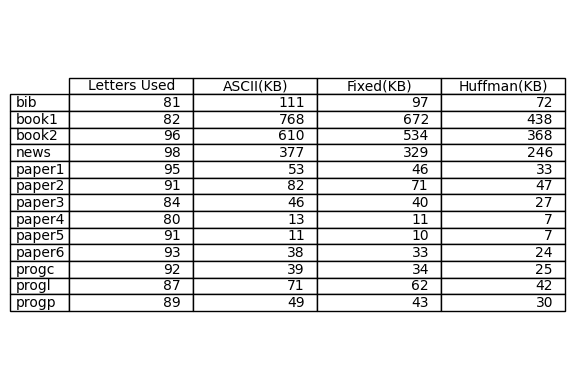

In [127]:

ascii_encoding = np.array(asciisize)
fixed_encoding = np.transpose(fixedlengthsize)
huffman_encoding = np.transpose(huffmansize)
lettersusedcol = np.transpose(lettersused)

table = np.vstack((lettersusedcol,ascii_encoding,fixed_encoding,huffman_encoding)).transpose()
fig, ax = plt.subplots()
# fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=table,rowLabels=calgary_corpus_files,colLabels=["Letters Used","ASCII(KB)","Fixed(KB)","Huffman(KB)"],loc="center")
plt.show()

# Observations and Discussion

## Overview of Experimental Results

The experiments were conducted on two well-known text corpora —  
the **Canterbury Large Corpus** and the **Calgary Corpus**.  
Each dataset was encoded using **Huffman coding**,  
and its compressed size was compared against both **ASCII (8-bit)** and the corresponding **Fixed-Length encoding**.

The goal was to understand how Huffman coding performs in practice across datasets of different kinds of data sets with  different symbols' distributions.

---

### Large Corpus Results

| Dataset | Letters Used | ASCII (KB) | Fixed (KB) | Huffman (KB) | Compression Ratio (Huffman/Fixed) |
|:---|---:|---:|---:|---:|---:|
| E.coli | 4 | 4638 | 1159 | 1159 | 1.00 |
| bible.txt | 63 | 4047 | 3035 | 2218 | 0.73 |
| world192.txt | 93 | 2408 | 2107 | 1504 | 0.71 |

**Interpretation:**
- For datasets like **E.coli**, which contain only four unique symbols (A, C, G, T) with nearly uniform frequencies,  
  Huffman coding and the fixed-length encoding produce *exactly the same compression*.  
  Each character naturally requires $\lceil \log_2 4 \rceil = 2$ bits — already optimal —  
  so no further improvement is theoretically possible.
- In contrast, English text datasets such as **bible.txt** and **world192.txt**  
  exhibit strong frequency skew (common letters like ‘e’ or spaces appear far more often).  
  As a result, Huffman coding achieves around **27–30% reduction** relative to fixed-length coding.


---

### Calgary Corpus Results

| Dataset | Letters Used | ASCII (KB) | Fixed (KB) | Huffman (KB) | Compression Ratio (Huffman/Fixed) |
|:---|---:|---:|---:|---:|---:|
| bib | 81 | 111 | 97 | 72 | 0.74 |
| book1 | 82 | 768 | 672 | 438 | 0.65 |
| book2 | 96 | 610 | 534 | 368 | 0.69 |
| news | 98 | 377 | 329 | 246 | 0.75 |
| paper1 | 95 | 53 | 46 | 33 | 0.72 |
| paper2 | 91 | 82 | 71 | 47 | 0.66 |
| paper3 | 84 | 46 | 40 | 27 | 0.68 |
| paper4 | 80 | 13 | 11 | 7 | 0.64 |
| paper5 | 91 | 11 | 10 | 7 | 0.70 |
| paper6 | 93 | 38 | 33 | 24 | 0.72 |
| progc | 92 | 39 | 34 | 25 | 0.73 |
| progl | 87 | 71 | 62 | 42 | 0.68 |
| progp | 89 | 49 | 43 | 30 | 0.70 |



**Observation:**
- On average, **Huffman coding reduced file size by about 30–35% relative to fixed-length encoding.**
- The improvement is more pronounced for text-heavy datasets such as books, papers, and source code,  
  where certain characters (spaces, vowels, semicolons, etc.) appear disproportionately often.
- More uniformly distributed data (like binary or object code) achieve less improvement  
  since the frequency imbalance (and hence entropy gap) is smaller.

---

## Key Observations and Patterns

1. **Code Length Mirrors Frequency**  
   Huffman’s structure directly reflects symbol frequencies —  
   the most frequent symbols are assigned *shorter codes*,  
   while rarer symbols get *longer ones*.  
   This inverse proportionality between code length and frequency  
   was consistently visible in the generated Huffman dictionaries.

2. **Alphabet Size and Frequency Distribution**  
   Compression gains depend heavily on symbol imbalance.  
   Smaller, uniform alphabets (like `E.coli`) show negligible benefit  
   because the frequency variance  is  minimal,  
   whereas high variance frequency text data compress  more efficiently.

3. **Compression Ratio (Relative to Fixed-Length)**  
   Across all datasets, Huffman achieved compression ratios between **0.65 and 0.75**,  
   i.e., files were typically **25–35% smaller** than their fixed-length encodings.

4. **Runtime and Scalability**  
   For large multi-megabyte datasets, the Huffman tree construction,  
   encoding, and decoding steps completed in a short time, hence making it practical to use.

5. **Verification and Correctness**  
   For every dataset, decoding the encoded text gave us the exact original text.  
   This verified both the **prefix-free** and **lossless** properties of Huffman coding.

---

## Overall Discussion

- These experiments clearly validate both the **theoretical optimality** and **empirical efficiency** of Huffman coding.  
- The length of each code was observed to be inversely related to its symbol’s frequency —  
  exactly as predicted by theory, minimizing the total expected code length.  
- The **`E.coli` dataset** provided a good control case:  
  since its four symbols were almost uniformly distributed,  
  Huffman coding offered no advantage beyond the fixed 2-bit representation —  
  hence perfectly matching the fixed length encoding.  
- Across both corpora, the average compression ratio (Huffman vs Fixed-Length) ranged from **0.65 to 0.75**.

These experimental findings strengthen the theoretical guarantees of Huffman coding.  
They confirm that the algorithm not only achieves optimal compression ratios but also exhibits highly efficient time complexity in practice.


## Performance

We test the performance of the algorithm using a subset of the Calgary corpus dataset.

In [ ]:
import timeit
paper_keys = [f"paper{i}" for i in range(1, 7)]

NUMBER_OF_RUNS = 10
REPEAT_COUNT = 5

for paper_key in paper_keys:
    # 1. Setup the context for the code statement.
    # We pass the data to the function here.
    setup_code = f"""
from __main__ import huffman_tree, calgary
data = calgary['{paper_key}']
    """
    
    # 2. The code statement to be timed.
    statement_code = "huffman_tree(data)"
    
    # Create the Timer object
    t = timeit.Timer(statement_code, setup_code)
    
    # Run the timing and get the list of results from the repeated runs
    results = t.repeat(repeat=REPEAT_COUNT, number=NUMBER_OF_RUNS)
    
    # Find the best time (minimum of the repeated runs)
    best_time = min(results)
    
    # Calculate the average time per single execution
    avg_time_per_run = (best_time / NUMBER_OF_RUNS) * 1000 # * 1000 to convert to milliseconds (ms)

    print(f"--- Timing for {paper_key} ---")
    print(f"Best time over {REPEAT_COUNT} repeats:")
    print(f"  {best_time:.4f} seconds for {NUMBER_OF_RUNS} loops.")
    print(f"  **Average time per execution: {avg_time_per_run:.3f} ms**")

#### Huffman Tree Construction Timing Summary

| Paper | Best Time (5 repeats, 10 loops) | Average Time per Execution |
|:-----:|:-------------------------------:|:--------------------------:|
| paper1 | 0.0532 seconds | **5.319 ms** |
| paper2 | 0.0860 seconds | **8.598 ms** |
| paper3 | 0.0463 seconds | **4.630 ms** |
| paper4 | 0.0154 seconds | **1.544 ms** |
| paper5 | 0.0132 seconds | **1.325 ms** |
| paper6 | 0.0375 seconds | **3.750 ms** |

# 9. Potential Issues and Improvement

Although the Huffman Encoding implementation works well for moderate inputs, a few refinements can make it more robust.

---

## **Memory Management and Large File Handling**

The current implementation loads the entire file into memory before computing frequencies and building the tree.  
For large datasets, this is inefficient and may exceed memory limits.

**Improvement:** Use a *streaming approach* — read data in small chunks and update frequency counts incrementally.

---

## **Binary Output Format: Bits vs ASCII Representation**

Encoded data are presently stored as ASCII characters (`'0'` and `'1'`), wasting space since each bit uses an entire byte.

**Improvement:** Output should be written as a true *bitstream*.  
Python libraries such as `bitarray` or `io.BytesIO` can pack bits into bytes efficiently.  
During decoding, bytes can be unpacked bit by bit for traversal.

---

# 10. Data Compression Algorithms

While **Huffman coding** forms the foundation of lossless data compression, many modern algorithms extend its ideas or combine them with other techniques to achieve higher efficiency across diverse data types.  
The key principle behind all such methods is to identify **patterns**, **redundancy**, or **predictability** in data and represent them using fewer bits.

---

## **Entropy-Based Methods**

These rely purely on symbol probabilities.  
The idea is simple: frequent symbols occupy fewer bits than rare ones, minimizing the overall expected message length.

- **Huffman Coding:** Assigns variable-length, prefix-free binary codes to symbols so that the average code length closely matches the source entropy.  
- **Arithmetic and Range Coding:** Extend Huffman’s idea by encoding the entire message as a single fractional number between 0 and 1, reaching near-optimal efficiency.

### **Arithmetic Coding**

While Huffman coding gives near-optimal compression, it still assigns each symbol an integer number of bits.  
**Arithmetic Coding** removes this limitation by encoding the entire message as a single number in $[0,1)$.

Instead of giving each symbol its own code, arithmetic coding keeps narrowing a range in proportion to symbol probabilities.  
The final interval uniquely represents the entire message.  
If we use an **EOC (End-of-Code)** symbol, we can represent the message using a single number rather than an interval.

**Example:**  

![image.png](imagearith.jpg)

Arithmetic coding comes closer to the theoretical entropy limit than Huffman coding since it is not bound by integer bit-lengths.  
It is widely used in modern formats such as `JPEG2000` and `H.264`.

At its core, arithmetic coding shows that an entire sequence — every word, idea, or even all human knowledge — could, in principle, be represented by a single number between 0 and 1.



---

## **Transform-Based Methods**

These methods reorganize data to expose redundancy before applying entropy coding.  
Instead of encoding symbols directly, they make the sequence more predictable.

- **Burrows–Wheeler Transform (BWT):** Rearranges data so that similar characters appear together, creating long runs of repeating symbols that compress better.  
- **Move-to-Front (MTF) Encoding:** Applied after BWT, it replaces each symbol with its position in a dynamically updated list. Recently used symbols move to the front, producing smaller indices and improving compressibility.  
- **Context Modeling:** Predicts a symbol’s probability from its preceding context, allowing adaptive encoding that learns patterns (used in algorithms like *Zstandard* and *PPM*).

---

## **Dictionary and Difference-Based Methods**

These methods exploit repetition and correlation instead of direct probability models.

- **Lempel–Ziv (LZ77/LZ78):** Replaces repeated substrings with references to earlier occurrences, forming the foundation of ZIP and PNG formats.  
- **Delta Compression:** Stores only the differences between consecutive values — effective for time-series or numerical data that change gradually.  
- **Run-Length Encoding (RLE):** Compresses consecutive identical symbols compactly (e.g., “AAAA” → “A×4”), ideal for structured or repetitive data.

---

## **Hybrid and Modern Techniques**

Most modern compressors combine multiple stages to exploit different kinds of redundancy:

$
\text{Transform} \;\rightarrow\; \text{Modeling} \;\rightarrow\; \text{Entropy Coding}
$

For example, **Bzip2** applies a Burrows–Wheeler Transform, followed by Move-to-Front and Huffman coding,  
while **Zstandard** combines dictionary matching with Range Asymmetric Numeral Systems (rANS).  
These hybrid systems merge structural and probabilistic compression to achieve near-entropy efficiency with practical speed.



# 11. Challenges Faced and Conclusion

---

## **Challenges Faced**

1. One of the main challenges we faced was setting up the programming environment. Installing Python, configuring the right libraries, and getting Jupyter and Git Bash to work properly took much longer than expected.

2. Even though we understood the Huffman algorithm conceptually, turning it into working code was far from straightforward. It took time to make the computer do exactly what we wanted — especially while handling text files, file paths, and encoding issues. Debugging small mistakes like queue ordering or missing cases often took hours.

<!-- 3. What surprised us most was how much effort it takes to correctly implement something that seems so basic on paper. Huffman’s algorithm is a simple algorithm, but even small modifications, misunderstandings, or blind spots make it tricky to get right in practice. -->

In the end, the experience made us appreciate how theory and implementation are two very different skills — and how much precision and patience real-world coding actually requires.

---

## **Improvements**

Generalizations and future enhancements include:

- Implementing binary-level compression to measure true disk savings.  
- Developing adaptive Huffman and arithmetic coding variants.  
- Applying Huffman coding to multimedia (images, audio).  
- Creating a graphical interface to visualize the encoding process.  
- Integrating entropy-based analysis to compare performance with the Shannon limit.  

---

## **Conclusion**

This project successfully implemented and analyzed **Huffman Encoding**, demonstrating its role as a classic example of a **greedy optimization algorithm**.  
The results verified that Huffman’s approach minimizes the expected number of bits per symbol while preserving exact reconstructability.  



---


# References

Huffman, D. A. (1952).  
*“A Method for the Construction of Minimum-Redundancy Codes.”*  
*Proceedings of the IRE*, 40(9), 1098–1101.

---

Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009).  
*Introduction to Algorithms* (3rd ed.). The MIT Press.  
Cambridge, Massachusetts; London, England. ISBN 978-0-262-03384-8.

---

University of Canterbury. (1997).  
*The Canterbury Corpus: A Collection of Benchmark Files for Data Compression Research.*  
[https://corpus.canterbury.ac.nz/descriptions/](https://corpus.canterbury.ac.nz/descriptions/)

---

GeeksforGeeks. (2025).  
*Binary Tree Data Structure.*  
[https://www.geeksforgeeks.org/dsa/binary-tree-data-structure/](https://www.geeksforgeeks.org/dsa/binary-tree-data-structure/)

---

Brudno, M. (2009).  
*Huffman Coding Lecture Notes.*  
Department of Computer Science, University of Toronto.  
[https://www.cs.utoronto.ca/~brudno/csc373w09/huffman.pdf](https://www.cs.utoronto.ca/~brudno/csc373w09/huffman.pdf)

---

GeeksforGeeks. (2025).  
*What are Data Compression Techniques?*  
[https://www.geeksforgeeks.org/electronics-engineering/what-are-data-compression-techniques/](https://www.geeksforgeeks.org/electronics-engineering/what-are-data-compression-techniques/)

---

Wikipedia (2025).  
*Huffman coding.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Huffman_coding](https://en.wikipedia.org/wiki/Huffman_coding)

---

Wikipedia (2025).  
*Canonical Huffman code.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Canonical_Huffman_code](https://en.wikipedia.org/wiki/Canonical_Huffman_code)

---

Wikipedia (2025).  
*Morse code.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Morse_code](https://en.wikipedia.org/wiki/Morse_code)

---

Wikipedia (2025).  
*Arithmetic coding.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Arithmetic_coding](https://en.wikipedia.org/wiki/Arithmetic_coding)

---

Wikipedia (2025).  
*Range coding.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Range_coding](https://en.wikipedia.org/wiki/Range_coding)

---

Wikipedia (2025).  
*Burrows–Wheeler transform.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Burrows–Wheeler_transform](https://en.wikipedia.org/wiki/Burrows%E2%80%93Wheeler_transform)

---

Wikipedia (2025).  
*Move-to-front transform.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Move-to-front_transform](https://en.wikipedia.org/wiki/Move-to-front_transform)

---

Wikipedia (2025).  
*Context modelling.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Context_modelling](https://en.wikipedia.org/wiki/Context_modelling)

---

Wikipedia (2025).  
*Lempel–Ziv compression.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Lempel–Ziv_compression](https://en.wikipedia.org/wiki/Lempel%E2%80%93Ziv_compression)

---

Wikipedia (2025).  
*Delta encoding.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Delta_encoding](https://en.wikipedia.org/wiki/Delta_encoding)

---

Wikipedia (2025).  
*Run-length encoding.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Run-length_encoding](https://en.wikipedia.org/wiki/Run-length_encoding)

---

Wikipedia (2025).  
*Data compression.* In *Wikipedia, The Free Encyclopedia.*  
[https://en.wikipedia.org/wiki/Data_compression](https://en.wikipedia.org/wiki/Data_compression)
